<a href="https://colab.research.google.com/github/Jayasree8120/Purchase-Analysis/blob/main/Purchase_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Downloading the Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from tabulate import tabulate


import warnings
warnings.simplefilter("ignore")

In [ ]:
# Importing datasets

# Loading the China dataset
china_df = pd.read_excel('/content/CN_Mobiles+-+Data.xlsx')

# # Loading the India dataset
# india_df = pd.read_excel("/content/IN_Mobiles+-+Data.xlsx")

### **Preprocessing and Feature Engineering**

In [ ]:
# Retrieves and display the dimensions of the China dataset
num_rows, num_columns = china_df.shape; print(f'China_df_Rows: {num_rows}, China_df_Columns: {num_columns}')

# Retrieves and display the dimensions of the India dataset
num_rows, num_columns = india_df.shape; print(f'India_df_Rows: {num_rows}, India_df_Columns: {num_columns}')

In [ ]:
 china_df['PURCHASE'].value_counts(normalize=True)

In [ ]:
# Display the first 5 records of the China dataset
print("The first 5 records of the China dataset :")
display(china_df.head())


# Print an empty line for spacing
print()

# Display the first 5 records of the India dataset
print("The first 5 records of the India dataset :")
display(india_df.head())

In [ ]:
# Shows data types and non-null counts for the China dataset
print("Information about China Dataset :")
china_df.info()

# Print an empty line for spacing
print()

# Shows data types and non-null counts for the India dataset
print("Information about India Dataset :")
india_df.info()

In [ ]:
# Generates and display a statistical summary of the China dataset
print("Statistical Data about China Dataset :")
display(china_df.describe())

# Print an empty line for spacing
print()

# Generates and display a statistical summary of the India dataset
print("Statistical Data about India Dataset :")
display(india_df.describe())

**Data Quality Check**

In [ ]:
# Count missing values in each column of the China dataset
print("Missing Values in China Dataset :")
print(china_df.isnull().sum())

# Print an empty line for spacing
print()

# Count missing values in each column of the India dataset
print("Missing Values in India Dataset :")
print(india_df.isnull().sum())

In [ ]:
# Check for any duplicate rows in the China dataset
print(f"Duplicates in China Dataset : {china_df.duplicated().any()}")

# Print an empty line for spacing
print()

# Check for any duplicate rows in the India dataset
print(f"Duplicates in India Dataset : {india_df.duplicated().any()}")

**Categorizing Data Columns**

In [ ]:
# Convert the Purchase_Date column to datetime format for accurate calculations for the India dataset
india_df['DT_OLD_PURCHASE'] = pd.to_datetime(india_df['DT_OLD_PURCHASE'])
# Define a given date for calculating the age of the phones
given_date = pd.to_datetime('2019-07-07')
# Calculate the age of the phones in days and store in a new column
india_df['AGE_PHN'] = (given_date - india_df['DT_OLD_PURCHASE']).dt.days
# Remove the original Purchase Date column as it's no longer needed
revised_india_df = india_df.drop('DT_OLD_PURCHASE', axis=1)

In [ ]:
def categorize_data(df, gender_column, income_column, age_column, phone_age_column):

    # Map gender values 'M' and 'F' to 0 and 1, respectively
    df['GENDER_CATEGORIZE'] = df[gender_column].map({'M': 0, 'F': 1})

    # Categorize income into segments
    df['INCOME_CATEGORIZE'] = df[income_column].apply(
        lambda income: 0 if income < 300000 else
                       1 if 300000 <= income < 800000 else
                       2 if 800000 <= income < 1200000 else
                       3
    )

    # Categorize current age into segments
    df['AGE_CATEGORIZE'] = df[age_column].apply(
        lambda age: 0 if age < 25 else
                    1 if 25 <= age < 35 else
                    2 if 35 <= age < 65 else
                    3
    )

    # Categorize phone age into segments
    df['PHONE_AGE_CATEGORIZE'] = df[phone_age_column].apply(
        lambda phone_age: 0 if phone_age < 100 else
                          1 if 100 <= phone_age < 400 else
                          2 if 400 <= phone_age < 700 else
                          3
    )

    return df

In [ ]:
# Apply the function to the China dataset
modified_china_df = categorize_data(
    df=china_df,
    gender_column='GENDER',
    income_column='ANN_INCOME',
    age_column='CURR_AGE',
    phone_age_column='AGE_PHN'
)

# Apply the function to the India dataset
modified_india_df = categorize_data(
    df=revised_india_df,
    gender_column='GENDER',
    income_column='ANN_INCOME',
    age_column='CURR_AGE',
    phone_age_column='AGE_PHN'
)

In [ ]:
# Display the modified China dataset
print("China Dataset Modified:")
display(modified_china_df.head())

print()

# Display the modified India dataset
print("India Dataset Modified:")
display(modified_india_df.head())

### **Exploratory Data Analysis**

**Univariate Charts**

1.    **Histogram**






In [ ]:
# Normal Histogram for Current Age in India Dataset
sns.histplot(data=modified_india_df, x='CURR_AGE',bins=10,  kde=True)
plt.title('Distribution of Current Age in India Dataset')
plt.xlabel('Current Age')
plt.ylabel('Count')
plt.show()

# Normal Histogram for Current Age in China Dataset
sns.histplot(data=modified_china_df, x='CURR_AGE',bins=10, kde=True)
plt.title('Distribution of Current Age in China Dataset')
plt.xlabel('Current Age')
plt.ylabel('Count')
plt.show()



2.   **Box Plot**







In [ ]:
# Box Plot for Annual Income in China Dataset
sns.boxplot(data=modified_china_df, x='ANN_INCOME')
plt.title('Box Plot of Annual Income in China Dataset')
plt.xlabel('Annual Income')
plt.show()

# Box Plot for Annual Income in India Dataset
sns.boxplot(data=modified_india_df, x='ANN_INCOME')
plt.title('Box Plot of Annual Income in India Dataset')
plt.xlabel('Annual Income')
plt.show()



3.  **Count Plot**




In [ ]:
# Count Plot for Gender in China Dataset
sns.countplot(data=modified_china_df, x='GENDER')
plt.title('Count of Genders in China Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Count Plot for Gender in India Dataset
sns.countplot(data=modified_india_df, x='GENDER')
plt.title('Count of Genders in India Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Bivariate Charts**

1.  **Line Plot**



In [ ]:
# Line Plot for Average Annual Income by Current Age in China Dataset
sns.lineplot(data=modified_china_df, x='CURR_AGE', y='ANN_INCOME', estimator='mean')
plt.title('Average Annual Income by Current Age in China Dataset')
plt.xlabel('Current Age')
plt.ylabel('Average Annual Income')
plt.show()

# Line Plot for Average Annual Income by Current Age in India Dataset
sns.lineplot(data=modified_india_df, x='CURR_AGE', y='ANN_INCOME', estimator='mean')
plt.title('Average Annual Income by Current Age in India Dataset')
plt.xlabel('Current Age')
plt.ylabel('Average Annual Income')
plt.show()




2.   **Box Plot**



In [ ]:
# Box Plot for Current Age by Gender in China Dataset
sns.boxplot(data=modified_china_df, x='GENDER', y='CURR_AGE')
plt.title('Current Age Distribution by Gender in China Dataset')
plt.xlabel('Gender')
plt.ylabel('Current Age')
plt.show()

# Box Plot for Current Age by Gender in India Dataset
sns.boxplot(data=modified_india_df, x='GENDER', y='CURR_AGE')
plt.title('Current Age Distribution by Gender in India Dataset')
plt.xlabel('Gender')
plt.ylabel('Current Age')
plt.show()

### **China Dataset: Model Training and Evaluation**

**Input and Target Columns**

In [ ]:
# Preprocess the China Dataset for model input by selecting relevant features
X = modified_china_df[['AGE_CATEGORIZE', 'GENDER_CATEGORIZE', 'INCOME_CATEGORIZE', 'PHONE_AGE_CATEGORIZE']]

# Define the target variable for the model
y = modified_china_df['PURCHASE']

# Split the dataset into training and validation sets
# 70% of the data will be used for training, and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42)

**Train and Prediction**

In [ ]:
# Train the Logistic Regression model using the training data

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the trained model on the test data
y_test_pred = model.predict(X_test)

**Evaluation**

In [ ]:
# Evaluate the model performance using a confusion matrix

# Calculate the confusion matrix using the true labels and predicted values
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix for inspection
print("Confusion Matrix (Test):\n", conf_matrix)

# Print the classification report to evaluate precision, recall, and F1-score
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# Plotting the confusion matrix for a visual representation
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            # xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Label the y-axis as 'Actual' for clarity
plt.ylabel('Actual')
# Label the x-axis as 'Predicted' for clarity
plt.xlabel('Predicted')
# Add a title to the plot for context
plt.title('Confusion Matrix (Test)')
# Display the plot
plt.show()

**Feature Importance**

In [ ]:
# Get the coefficients of the features from the trained Logistic Regression model
coefficients = model.coef_[0]

# Create a DataFrame to represent feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Calculate the absolute importance of each feature
feature_importance['Importance'] = feature_importance['Coefficient'].abs()

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame for review
display(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))

# Create a bar plot for feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

# Add a title to the plot
plt.title('Feature Importance from Logistic Regression')

# Label the x-axis as 'Importance (Absolute Coefficient)' for clarity
plt.xlabel('Importance (Absolute Coefficient)')

# Label the y-axis as 'Features' for clarity
plt.ylabel('Features')

# Display the plot
plt.show()

In [ ]:
# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Create a DataFrame for the coefficients and variable names
feature_names = X_train.columns
coeff_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
})

# Add the intercept as a row
coeff_df.loc[-1] = ['Intercept', intercept]
coeff_df.index = coeff_df.index + 1
coeff_df = coeff_df.sort_index()

# Define interpretations for each variable
interpretations = {
    "Intercept": "",
    "AGE_CATEGORIZE": "As the customer falls into an older age category, the probability of buying a new phone decreases.",
    "GENDER_CATEGORIZE": "If the customer is female, the probability of buying a new phone is lower.",
    "INCOME_CATEGORIZE": "As the customer falls into a higher income category, they are more likely to buy a new phone.",
    "PHONE_AGE_CATEGORIZE": "As the phone gets older, the customer is significantly more likely to buy a new phone."
}

# Add the interpretations to the DataFrame
coeff_df['Interpretation'] = coeff_df['Variable'].map(interpretations)

# Print the DataFrame as a formatted table without index
print(tabulate(coeff_df, headers='keys', tablefmt='grid', stralign='center', numalign='center', showindex=False))

### **India Dataset: Model Training and Evaluation**

**Training and Prediction**

In [ ]:
# Preprocess the test data by selecting relevant features for model input
validation_df = modified_india_df[['AGE_CATEGORIZE', 'GENDER_CATEGORIZE', 'INCOME_CATEGORIZE', 'PHONE_AGE_CATEGORIZE']]

# Make predictions on the preprocessed test data
y_test_pred = model.predict(validation_df)

# Add the predicted purchase outcomes to the modified India DataFrame
modified_india_df['PURCHASE'] = y_test_pred

modified_india_df.head()

### **Clustering**

**Potential Customer Dataset**

In [ ]:
# Select relevant columns for further analysis: Current Age, Annual Income, Phone Age and Purchase
df_potential_customers = modified_india_df[['CURR_AGE', 'ANN_INCOME', 'AGE_PHN', 'PURCHASE']]

# Display the first few rows of the potential customers DataFrame
df_potential_customers.head()

**Scaling & Standardization**

In [ ]:
# Initialize the StandardScaler for scaling and standardizing the data
scaler = StandardScaler()

# Fit the scaler to the potential customers DataFrame and transform the data
scaled_data = scaler.fit_transform(df_potential_customers)

**Finding K**

In [ ]:
# Range of K values to test
K_values = range(2, 8)
wcss = []

# Loop over K values and fit K-Means
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_

# Plotting WCSS
plt.figure(figsize=(10, 6))
plt.plot(K_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

In [ ]:
# Create KMeans model with 4 clusters and set a random state for consistency
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model to the scaled data to find clusters
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame of potential customers
df_potential_customers['CLUSTER'] = kmeans.labels_

# Show the first5 records with the cluster labels
display(df_potential_customers.head())

In [ ]:
# Define cluster descriptions
cluster_descriptions = {
    0: "Younger, entry-level customers with lower annual incomes.",
    1: "Established middle-aged professionals with high annual incomes.",
    2: "Older customers with moderate to high incomes and older phones.",
    3: "Experienced middle-aged customers with varied high incomes."
}

# Create a DataFrame from the descriptions
cluster_summary = pd.DataFrame({
    'CLUSTER': list(cluster_descriptions.keys()),
    'DESCRIPTION': list(cluster_descriptions.values())
})

# Print the DataFrame as a formatted table
print(tabulate(cluster_summary, headers='keys', tablefmt='grid', stralign='center', numalign='center',showindex=False))

In [ ]:
def cluster_summary(df):
    # Group by 'CLUSTER' and calculate the required values
    summary = df.groupby('CLUSTER').agg(
        avg_income=('ANN_INCOME', 'mean'),
        customers=('PURCHASE', 'count'),  # Count all customers in each cluster
        potential_customers=('PURCHASE', lambda x: (x == 1).sum()),  # Count only those who purchased
        total_income=('ANN_INCOME', lambda x: (x[df['PURCHASE'] == 1]).sum())
    )

    # Round the values to the nearest whole number and convert to formatted strings
    summary['avg_income'] = summary['avg_income'].round().astype(int).apply(lambda x: f"{x:,}")
    summary['total_income'] = summary['total_income'].round().astype(int).apply(lambda x: f"{x:,}")

    # Calculate totals for potential customers and total income
    totals = {
        'avg_income': '',
        'customers': summary['customers'].sum(),
        'potential_customers': summary['potential_customers'].sum(),
        'total_income': summary['total_income'].sum()
    }

    # Append totals as a new row in the summary DataFrame
    summary.loc['Total'] = totals

    # Display the summary in table format using tabulate
    print(tabulate(summary, headers='keys', tablefmt='grid', numalign='center', stralign='center'))

# Assuming df_potential_customers is your DataFrame with 'CLUSTER', 'ANN_INCOME', and 'PURCHASE' columns
cluster_summary(df_potential_customers)

**Cluster EDA**

In [ ]:
# Create a 3D figure for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the scaled data points, colored by their cluster
scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=df_potential_customers['CLUSTER'], cmap='viridis', s=50)

# Set the title and labels for the axes
ax.set_title('K-Means Clustering in 3D')
ax.set_xlabel('Current Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age of Phone')

# Display color legend for the clusters
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Transform centroids back to the original scale for better interpretation
centroids_original = scaler.inverse_transform(centroids)

# Create a DataFrame with the centroids for clearer representation
centroid_df = pd.DataFrame(centroids_original, columns=['CURR_AGE', 'ANN_INCOME', 'AGE_PHN','PURCHASE'])

# Display the centroids for each cluster
print("Centroids of the clusters:\n", centroid_df)  # Show the calculated centroids

# Describe each cluster's data
for cluster in range(4):  # Loop through each cluster (change to the number of clusters if different)
    print(f"\nCluster {cluster} summary:")  # Print the cluster number for reference
    # Display descriptive statistics for the data points in the current cluster
    display(df_potential_customers[df_potential_customers['CLUSTER'] == cluster].describe())

In [ ]:
#Clustering Summary

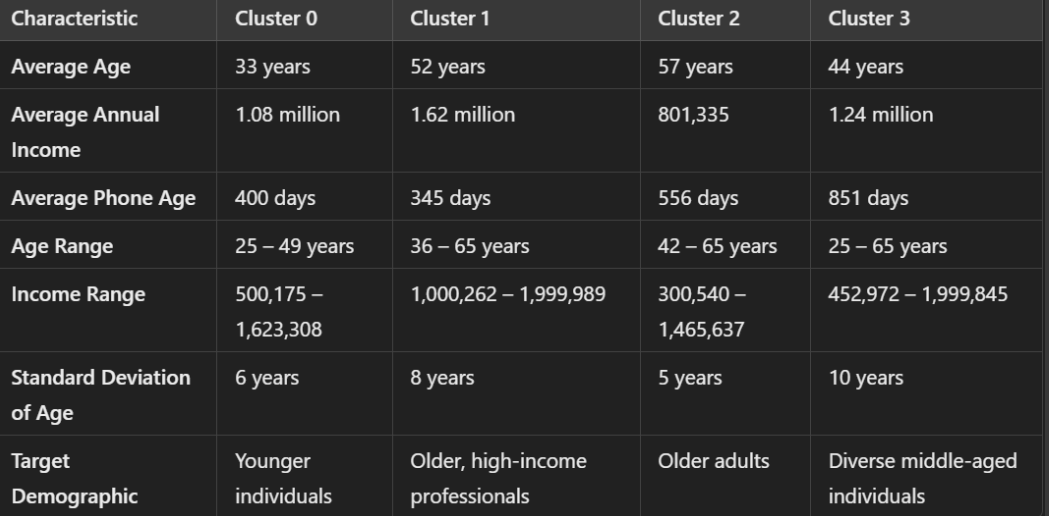


*  **Age and Income Distribution: Cluster 0 has the youngest average age (33) and the lowest average annual income, while Cluster 2 has the highest average age (57) with a relatively lower annual income compared to Cluster 1.**
* **Purchase Behavior: The average AGE_PHN in Cluster 3 is the highest (851), indicating that customers in this cluster may have older phones, suggesting a potential market for upgrades.**







*   **Additional Approaches Tried:**

    *   Implemented predictions without categorizing the columns: Current Age, Annual Income, and Phone Age.
    *   Experimented with standardization, ordinal encoding etc.
    *   Converted dates into years for the Phone Age feature.
    *   Tried an iteration Including the Gender column in the clustering process.











Finding the best Model

In [ ]:
# prompt: pycaret classification model code

from pycaret.classification import *

# df = modified_china_df[['AGE_CATEGORIZE', 'GENDER_CATEGORIZE', 'INCOME_CATEGORIZE', 'PHONE_AGE_CATEGORIZE', 'PURCHASE']]
df= modified_china_df[['CURR_AGE', 'GENDER_CATEGORIZE','ANN_INCOME','AGE_PHN', 'PURCHASE' ]]

# Initialize the setup
clf = setup( data = df, target = 'PURCHASE')

# Compare different models
compare_models(sort='F1')

In [ ]:

best_model = create_model('xgboost')

evaluate_model(best_model)

plot_model(best_model, plot = 'feature')

In [ ]:

predictions = predict_model(best_model)


from sklearn.metrics import classification_report

print(classification_report(predictions['PURCHASE'], predictions['prediction_label']))

In [ ]:
tuned_model = tune_model(best_model)

# Evaluate the model's performance
evaluate_model(tuned_model)

plot_model(tuned_model, plot = 'feature')

In [ ]:


predictions = predict_model(tuned_model)


from sklearn.metrics import classification_report

print(classification_report(predictions['PURCHASE'], predictions['prediction_label']))

